# Analysis of PE-HD market drivers

In [10]:
# importing Python libraries to be used
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling as pdpf
from IPython.display import HTML

% matplotlib inline

## Reading and subsetting the data
* data is read out of the file as composed by Keyrus
* data is filtered by only keeping some important price variables, the fides data and the trade data
* only the period as of 01/01/2014 is retained

In [11]:
# read data
data = pd.read_csv("\\\me0255\\users$\\MECLIJDA\\Data Science\\01 Pricing\\pomargin\\framework\\" + 
                   "data\\Borealis_margin_with_new_data.csv",sep=";",decimal=',')

# subset data: use specific columns
HDIM_prices = [0,3,5,9,13,31,155,168,169,170]
HDIM_Fides = [197,200,215,221,228,233]
HDIM_cols = HDIM_prices + HDIM_Fides
data = data[HDIM_cols]

# subset data: use rows between 1/1/2014 and 31/12/2015
data = data[150:174]

# add a new data field by combining 2 others
data['NetImp_HD'] = data['Import_HD']-data['Export_HD']

print "(rows: examples, cols: features) - " + str(data.shape)
HTML('<b><font color="DodgerBlue">' + "Variable list: " + '</font></b><i>' + str(data.columns.values.tolist()) + '</i>')

(rows: examples, cols: features) - (24, 17)


## Display data as trend

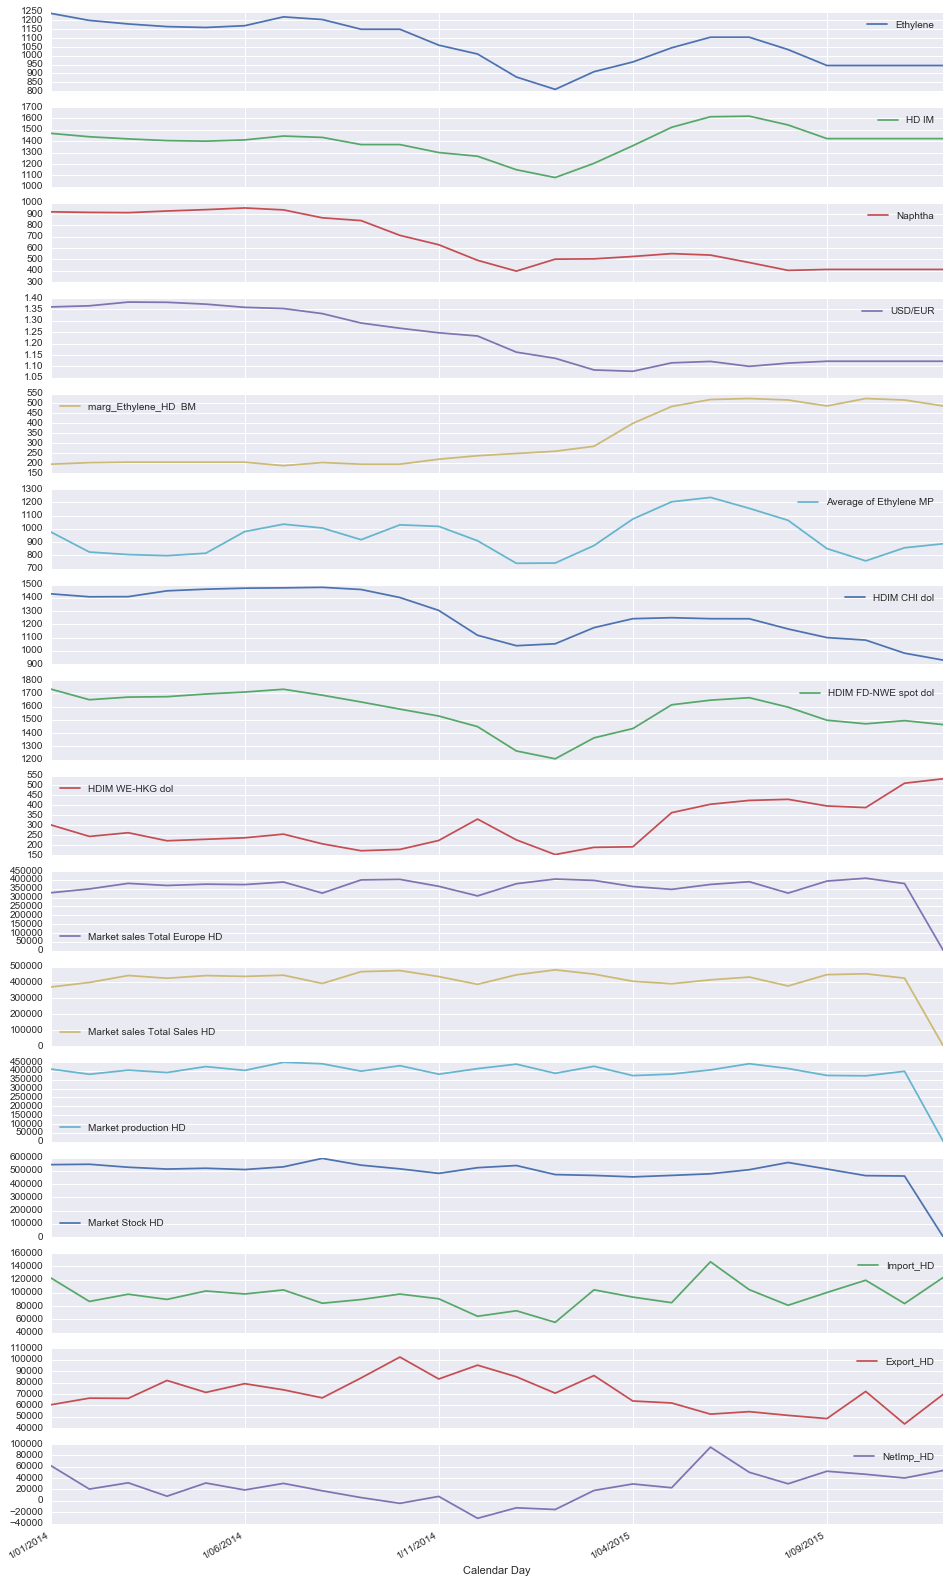

In [12]:
# plot the data on a time scale
data[:24].plot(x='Calendar Day',figsize=(16,30),subplots=True, sort_columns=True)
plt.show()

## Create lag features for all data

In [13]:
# add lag variables
df = data
numLags = 4
for i in range(numLags):
    df = pd.merge(left=df,right=data.shift(i+1),left_index=True,right_index=True,suffixes=("","_lag"+str(i+1)))
df=df.replace(0, np.nan)
print df.shape

(24, 85)


The original 17 features are multiplied 4 times by adding lag1 to lag4 features (17+17*4)

## Create Pearson correlation matrix

In [14]:
# create Pearson correlation matrix
corrmat = df.corr()
print corrmat.shape

(80, 80)


## Plot data relations between variables
Each plot in the grid shows the relation between 2 variables.

The **corr-value** is the Pearson correlation coefficient between two random variables $X$ and $Y$ and is defined as
$$r = \frac{cov(X,Y)}{\sqrt{var(X)} \sqrt{var(Y)}}$$
with
$$ cov(X,Y)=\frac1{n-1}\sum_{i=1}^n(X_i-\bar X)(Y_i-\bar Y) $$
and
$$ var(X)=\frac1{n-1}\sum_{i=1}^n(X_i-\bar X)^2 $$

* High correlation: 0.5 to 1.0 or -0.5 to -1.0.
* Medium correlation: 0.3 to 0.5 or -0.3 to -0.5.
* Low correlation: 0.1 to 0.3 or -0.1 to -0.3.

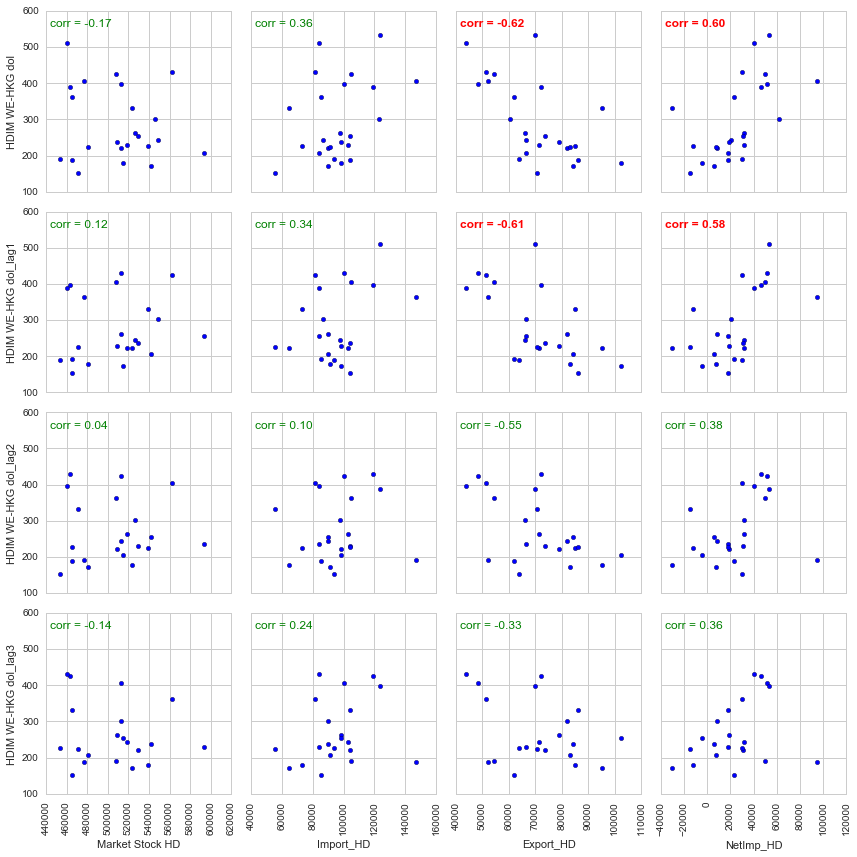

In [15]:
#col = [df.columns.values.tolist()[b] for b in [7,8,9,10]]
col = [df.columns.values.tolist()[b] for b in [13,14,15,16]]
rowvar = "HDIM WE-HKG dol"
row = [rowvar] + [rowvar + '_lag' + str(i+1) for i in range(3)]
#row = [df.columns.values.tolist()[b] for b in [7,8,9,10]]

def plotDataRelations(row, col):
    sns.set_style("whitegrid")
    f, axes = plt.subplots(len(row), len(col), figsize=(3*len(col), 3*len(row)),sharey=True)
    for i, stri in enumerate(row):
        axes[i,0].set_ylabel(stri)
        for j, strj in enumerate(col):
            axes[i,j].scatter(df[strj],df[stri])
            #axes[i,j].annotate(corrmat[stri][strj],xy=(1100,0))
            if (abs(corrmat[stri][strj]) > 0.55):
                axes[i,j].text(0.02, 0.93,"corr = " + '{0:.2f}'.format(corrmat[stri][strj]), 
                    ha='left', va='center', transform=axes[i,j].transAxes, size=12, color='r',weight='bold')
            else:
                axes[i,j].text(0.02, 0.93,"corr = " + '{0:.2f}'.format(corrmat[stri][strj]), 
                    ha='left', va='center', transform=axes[i,j].transAxes, size=12, color='g')
            #sns.regplot(x=stri,y=strj,data=df,ax=axes[i,j],ci=None,fit_reg=True)
            if stri == row[-1]:
                axes[i,j].set_xlabel(strj)
                for tick in axes[i,j].get_xticklabels():
                    tick.set_rotation(90)
            else:
                plt.setp(axes[i,j].get_xticklabels(), visible=False)
            #plt.xticks(rotation=45)

    f.tight_layout()
    plt.show()

plotDataRelations(row, col)

### Results
* 'HDIM WE-HKG dol' spreads do not predict Import, Export or Net Imp volumes well
* NetImp and Export show still some correlation with 'HDIM WE-HKG dol' and 'HDIM WE-HKG dol_lag1', but in practice these findings cannot be used because the data are not available (in July only trade data for April (lag3) are available)

## Heatmap for orginal data
showing correlations between data

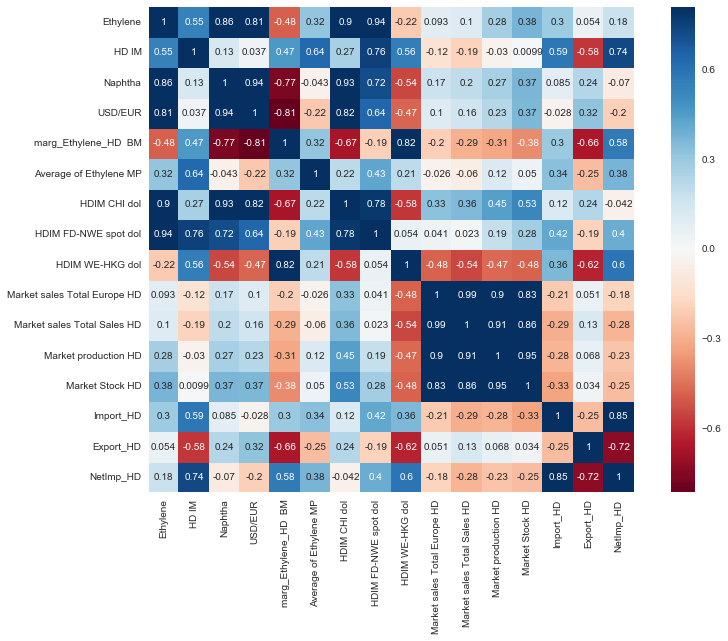

In [16]:
# generate heatmap
corrmat1 = data.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat1, vmax=.8, square=True, yticklabels=True, annot=True,cmap="RdBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

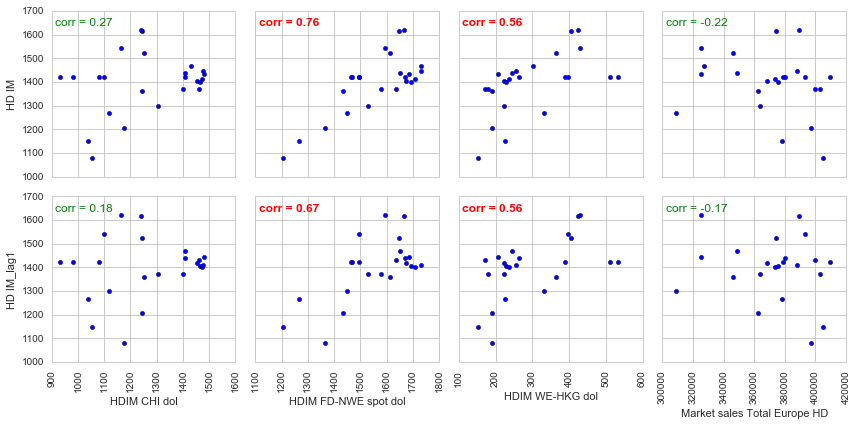

In [17]:
col = [df.columns.values.tolist()[b] for b in [7,8,9,10]]
#col = [df.columns.values.tolist()[b] for b in [13,14,15,16]]
rowvar = "HD IM"
row = [rowvar] + [rowvar + '_lag' + str(i+1) for i in range(1)]
#row = [df.columns.values.tolist()[b] for b in [7,8,9,10]]
plotDataRelations(row, col)

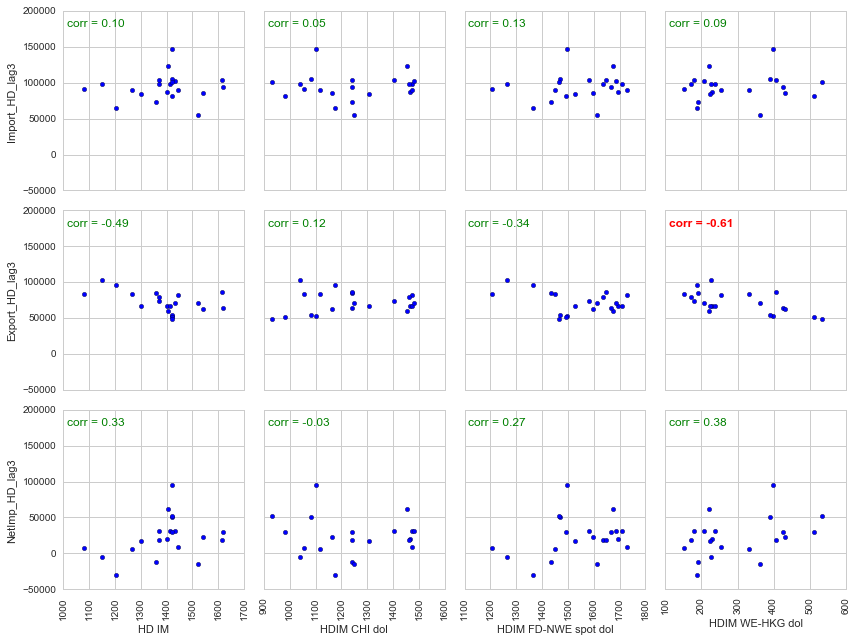

In [18]:
row = [df.columns.values.tolist()[b]+"_lag3" for b in [14,15,16]]
col = ['HD IM','HDIM CHI dol', 'HDIM FD-NWE spot dol', 'HDIM WE-HKG dol']
plotDataRelations(row, col)

### Observations
Usually we only know the lag3 values of the trade data. They however do not show any big relation with current prices in Europe or Asia.